https://rstudio-pubs-static.s3.amazonaws.com/547806_e51b8f800a244adaa8cb700b6eea95cb.html

http://rstudio-pubs-static.s3.amazonaws.com/203045_9744ef21cf43440e8aecc4abc284c6ad.html

# U.S. News & World Report’s College Data

## 一. <a href='#資料介紹'>資料介紹</a>

1. 來源
2. 資料介紹
3. 欄位


## 二. <a href='#呈現'>呈現</a>
1. <a href='#1.-Load-Libraries'>Load Libraries</a>
2. <a href='#2.-Load-Data'>Load Data</a>
3. <a href='#3.-Data-Preprocessing'>Data Preprocessing</a>          
4. <a href='#4.-Analyze-Data'>Analyze Data</a>        
5. <a href='#5.-PCA'>PCA</a>


## 資料介紹


### 1.來源
[An Introduction to Statistical Learning with Applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) 這本書裡使用到的資料集 - [College.csv](http://faculty.marshall.usc.edu/gareth-james/ISL/College.csv)

[Kaggle](https://www.kaggle.com/flyingwombat/us-news-and-world-reports-college-data) 上也可以下載得到

### 2.資料介紹
根據1995年《[U.S. News & World Report’s](https://www.usnews.com)》發布的美國大學的統計數據。

### 3.欄位

Shape：(777, 18)


英文欄位|中文欄位|描述
:---:|:---:|:---
Private|私立學校|No：公立學校 / Yes：私立學校
Apps|申請數量|Number of applications received
Accept|接受的申請數量|Number of applications accepted
Enroll|註冊數量|Number of new students enrolled
Top10perc|新生在高中的班排為前10%的比例|Pct. new students from top 10% of H.S. class
Top25perc|新生在高中的班排為前25%的比例|Pct. new students from top 25% of H.S. class
F.Undergrad|全職學生|Number of fulltime undergraduates
P.Undergrad|非全職學生|Number of parttime undergraduates
Outstate|州外學費|Out-of-state tuition
Room.Board|食宿費用|Room and board costs
Books|書籍費用|Estimated book costs
Personal|個人花費|Estimated personal spending
PhD|教職員為博士的比例|Pct. of faculty with Ph.D.’s
Terminal|教職員為終身職的比例|Pct. of faculty with terminal degree
S.F.Ratio|師生比|Student/faculty ratio
perc.alumni|校友捐獻的比例|Pct. alumni who donate
Expend|每個學生的教學支出|Instructional expenditure per student
Grad.Rate|畢業率|Graduation rate

<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>

---

## 呈現

## 1. Load Libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
pd.set_option('display.float_format',lambda x : '%.2f' % x)
sns.set()

<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>

---

## 2. Load Data

In [33]:
df = pd.read_csv("../input/College.csv", index_col=0)

### 資料筆數：(777, 18)

In [32]:
df.shape

(777, 18)

In [12]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [47]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
count,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.80,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46,0.73
std,3870.20,2451.11,929.18,17.64,19.80,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18,0.45
min,81.00,72.00,35.00,1.00,9.00,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00,0.00
25%,776.00,604.00,242.00,15.00,41.00,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00,0.00
50%,1558.00,1110.00,434.00,23.00,54.00,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00,1.00
75%,3624.00,2424.00,902.00,35.00,69.00,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00,1.00
max,48094.00,26330.00,6392.00,96.00,100.00,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00,1.00


<a href='#U.S.-News-&-World-Report’s-College-Data'>Back To Top</a>

---

## 3. Data Preprocessing
1. Private Yes/No to 1/0
2. Missing Value
3. Outlier
4. Date Split Year / Month / Hour / Year_Month / Week
5. Date Before 2011-12-01
6. Drop Quantity > quantile(.999)
7. Drop Irrelevant Items


方法|刪除多少筆資料|剩多少筆資料
:---:|:---:|:---:
Drop Duplicates|5,268|536,641
Missing Value|135,037|401,604


### 3.1 Private Yes/No to 1/0

In [34]:
df['Cluster'] = df['Private'].apply(lambda x:1 if x =='Yes' else 0)
df = df.drop(['Private'], axis=1)

In [35]:
df.head(3)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1


### 3.2 Missing Value

In [42]:
def na_check(df):
    missing = pd.DataFrame(df.isnull().sum(), columns=['missing'])
    missing = missing.sort_values(ascending=False, by=['missing'])
    missing = missing[missing['missing']>0]
    if len(missing)==0:
        print('No Missing Value !')
    else:
        display(missing)
na_check(df)

No Missing Value !


### 3.3 Percentage

In [49]:
df[df['PhD']>99]

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Bryn Mawr College,1465,810,313,71,95,1088,16,18165,6750,500,1200,100,100,12.30,49,17449,89,1
Harvey Mudd College,1377,572,178,95,100,654,5,17230,6690,700,900,100,100,8.20,46,21569,100,1
Pitzer College,1133,630,220,37,73,750,30,17688,5900,650,850,100,100,10.40,11,14820,73,1
Texas A&M University at Galveston,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.40,16,6415,43,0


## 4.-Analyze-Data



## 5. PCA

In [15]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [23]:
#輸入有多少成份我們想要留住分解
pca = PCA(n_components=2)

#將資料轉成兩個主成份
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#原本有30種維度
scaled_data.shape

#轉型後變成只有兩種維度
x_pca.shape

(777, 2)

Text(0, 0.5, 'Second Principle Component')

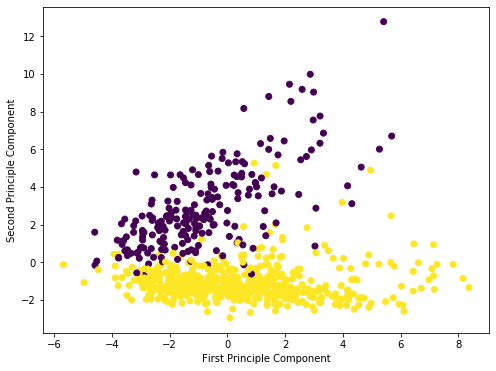

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Cluster'])
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [29]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.30332963 0.2808937 ]
